# 1. Building a Basic GAN (Generating 2D Shapes)

Epoch 0, Disc Loss: 1.466046929359436, Gen Loss: 0.7995500564575195


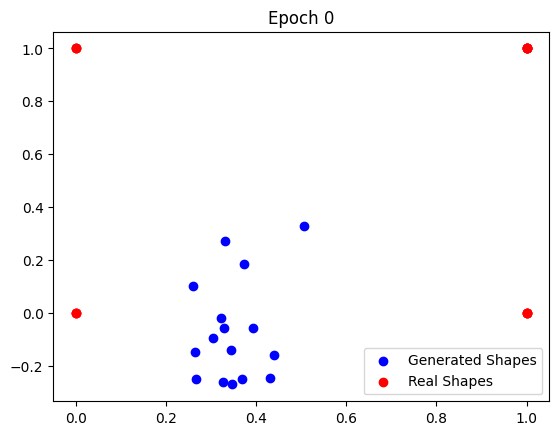

Epoch 100, Disc Loss: 1.3004670143127441, Gen Loss: 0.7736294269561768


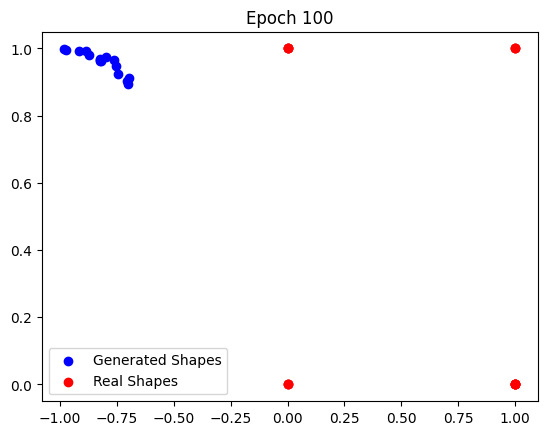

Epoch 200, Disc Loss: 1.460510015487671, Gen Loss: 0.7959232330322266


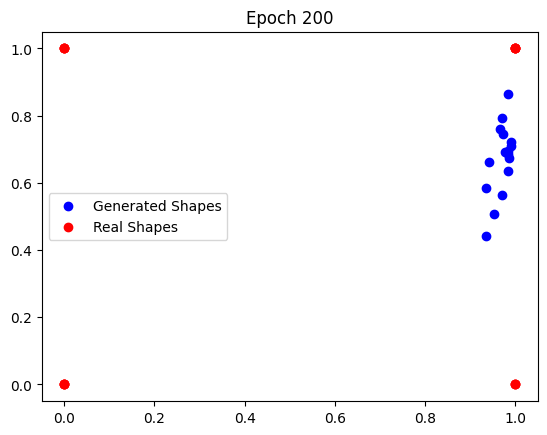

Epoch 300, Disc Loss: 1.1600379943847656, Gen Loss: 0.7053267955780029


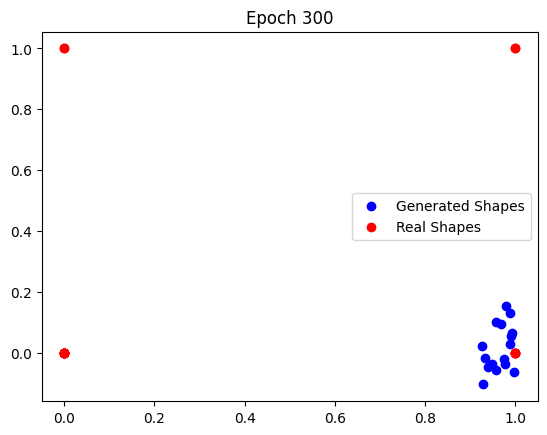

Epoch 400, Disc Loss: 2.033247947692871, Gen Loss: 0.3725053668022156


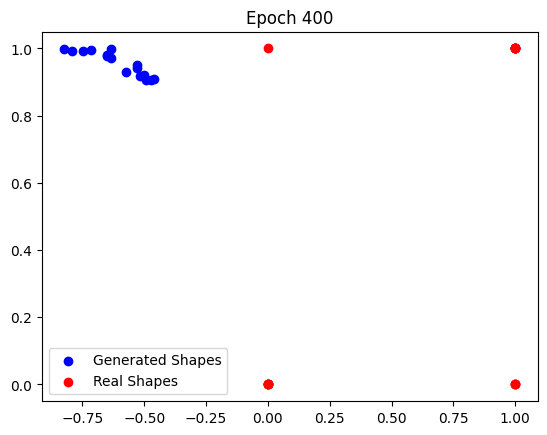

Epoch 500, Disc Loss: 1.2958958148956299, Gen Loss: 0.9069232940673828


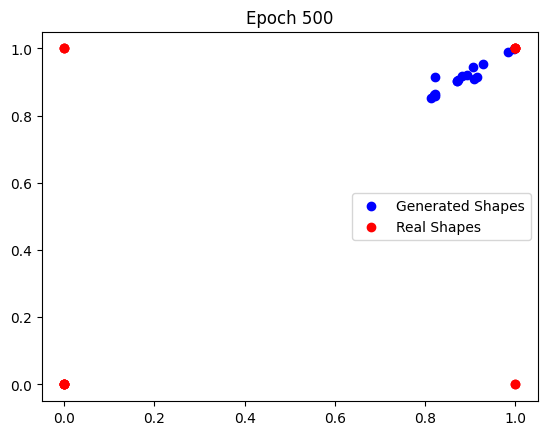

Epoch 600, Disc Loss: 1.3049390316009521, Gen Loss: 0.9212762713432312


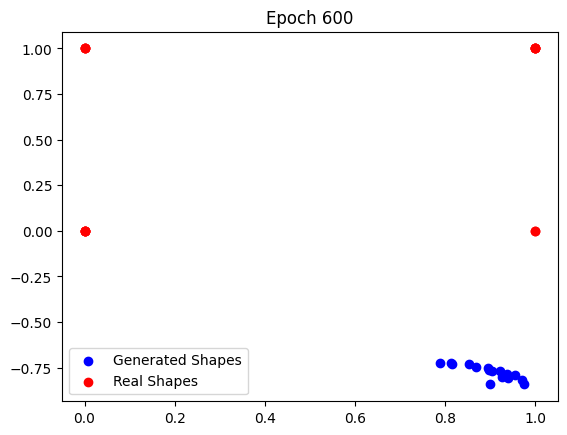

Epoch 700, Disc Loss: 1.4173808097839355, Gen Loss: 0.6167161464691162


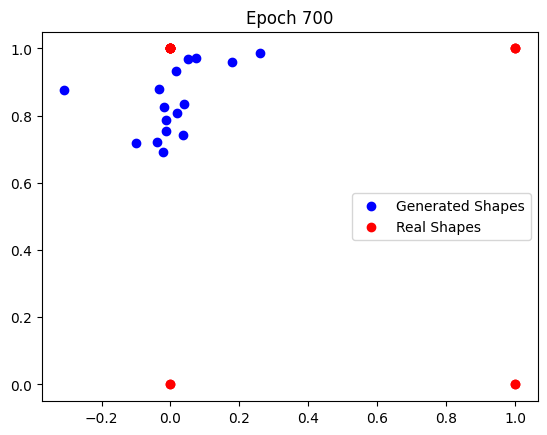

Epoch 800, Disc Loss: 1.269538164138794, Gen Loss: 0.9108325839042664


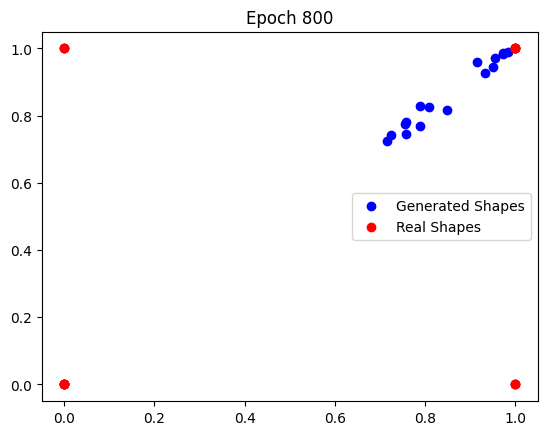

Epoch 900, Disc Loss: 1.4671480655670166, Gen Loss: 0.6570217609405518


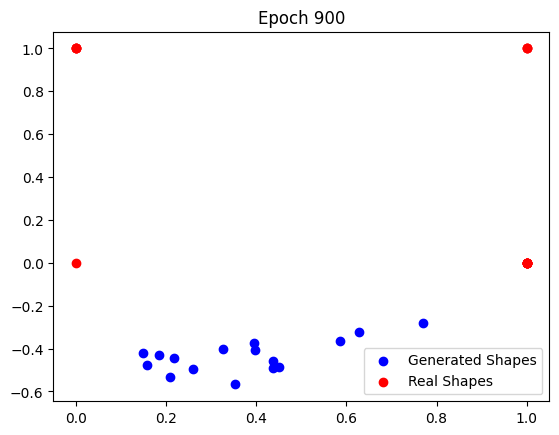

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate a dataset of 2D shapes (circles and squares)
def generate_shapes(batch_size):
    # Returns random binary vectors representing shapes
    shapes = np.random.choice([0, 1], (batch_size, 2))
    return torch.Tensor(shapes)

# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator()
discriminator = Discriminator()
optim_gen = optim.Adam(generator.parameters(), lr=0.001)
optim_disc = optim.Adam(discriminator.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Training Loop
for epoch in range(1000):
    # Generate real and fake data
    real_data = generate_shapes(batch_size=16)
    fake_data = generator(torch.randn(16, 2))

    # Train Discriminator
    optim_disc.zero_grad()
    real_loss = criterion(discriminator(real_data), torch.ones(16, 1))
    fake_loss = criterion(discriminator(fake_data.detach()), torch.zeros(16, 1))
    disc_loss = real_loss + fake_loss
    disc_loss.backward()
    optim_disc.step()

    # Train Generator
    optim_gen.zero_grad()
    gen_loss = criterion(discriminator(fake_data), torch.ones(16, 1))
    gen_loss.backward()
    optim_gen.step()

    # Visualization
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Disc Loss: {disc_loss.item()}, Gen Loss: {gen_loss.item()}")

        # Plot generated data
        generated_data = fake_data.detach().numpy()
        plt.scatter(generated_data[:, 0], generated_data[:, 1], color='blue', label='Generated Shapes')
        plt.scatter(real_data[:, 0], real_data[:, 1], color='red', label='Real Shapes')
        plt.legend()
        plt.title(f'Epoch {epoch}')
        plt.show()

# 2. GAN (cGAN) for Digit Generation

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.9MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.91MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.55MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Epoch 0, Disc Loss: 0.852730393409729, Gen Loss: 1.348865032196045


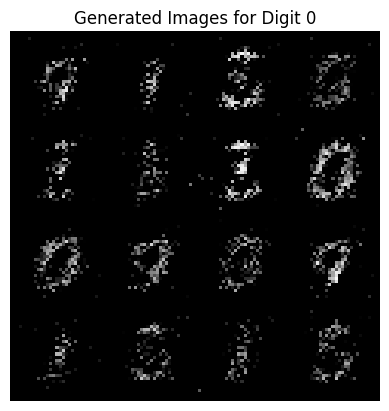

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision

# Load and preprocess MNIST dataset
mnist_data = datasets.MNIST(root='.', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
]))

# Create DataLoader for MNIST dataset
batch_size = 64
mnist_loader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

# Define the Generator for cGAN
class CGANGenerator(nn.Module):
    def __init__(self):
        super(CGANGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(110, 128),  # 100 noise + 10 label
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Tanh()  # Outputs between -1 and 1 for MNIST
        )

    def forward(self, noise, labels):
        input = torch.cat((noise, labels), dim=1)
        return self.model(input).view(-1, 1, 28, 28)

# Define the Discriminator for cGAN
class CGANDiscriminator(nn.Module):
    def __init__(self):
        super(CGANDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(794, 128),  # 784 image + 10 label
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, images, labels):
        input = torch.cat((images.view(images.size(0), -1), labels), dim=1)
        return self.model(input)

# Initialize models and optimizers
cgan_generator = CGANGenerator()
cgan_discriminator = CGANDiscriminator()
optim_gen = optim.Adam(cgan_generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_disc = optim.Adam(cgan_discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Visualization function for generated digits
def visualize_generated_digits(generator, digit):
    noise = torch.randn(16, 100)
    labels = torch.zeros(16, 10)
    labels[torch.arange(16), digit] = 1  # Generate images for specific digit

    with torch.no_grad():
        generated_images = generator(noise, labels).view(-1, 1, 28, 28)

    grid = torchvision.utils.make_grid(generated_images, nrow=4)
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
    plt.title(f"Generated Images for Digit {digit}")
    plt.axis('off')  # Hide axes
    plt.show()

# Training Loop
num_epochs = 1000  # Set your number of epochs

for epoch in range(num_epochs):
    for real_images, labels in mnist_loader:
        batch_size = real_images.size(0)

        # Create real and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Generate noise and one-hot encoded labels
        noise = torch.randn(batch_size, 100)
        one_hot_labels = torch.zeros(batch_size, 10)
        one_hot_labels[torch.arange(batch_size), labels] = 1

        # Train Discriminator
        optim_disc.zero_grad()
        outputs_real = cgan_discriminator(real_images, one_hot_labels)
        loss_real = criterion(outputs_real, real_labels)

        fake_images = cgan_generator(noise, one_hot_labels)
        outputs_fake = cgan_discriminator(fake_images.detach(), one_hot_labels)  # Detach here
        loss_fake = criterion(outputs_fake, fake_labels)

        disc_loss = loss_real + loss_fake
        disc_loss.backward()
        optim_disc.step()

        # Train Generator
        optim_gen.zero_grad()
        outputs = cgan_discriminator(fake_images, one_hot_labels)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optim_gen.step()

    # Visualization
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Disc Loss: {disc_loss.item()}, Gen Loss: {gen_loss.item()}")
        visualize_generated_digits(cgan_generator, digit=0)  # Example for digit '0'


# 3.  DCGAN for Image Generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision

# Load and preprocess CelebA dataset
celeba_data = datasets.CelebA(root='/content/CelebA', split='train', download=True, transform=transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
]))

# Create DataLoader for CelebA dataset
batch_size = 64
celeba_loader = DataLoader(celeba_data, batch_size=batch_size, shuffle=True)

# Define DCGAN Generator and Discriminator classes
class DCGANGenerator(nn.Module):
    def __init__(self):
        super(DCGANGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class DCGANDiscriminator(nn.Module):
    def __init__(self):
        super(DCGANDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize DCGAN models and optimizers
dcgan_generator = DCGANGenerator()
dcgan_discriminator = DCGANDiscriminator()
optim_gen = optim.Adam(dcgan_generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_disc = optim.Adam(dcgan_discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Visualization function for generated faces
def visualize_generated_faces(generator, epoch):
    noise = torch.randn(16, 100, 1, 1)  # DCGAN input size
    with torch.no_grad():
        generated_images = generator(noise).cpu()
    grid = torchvision.utils.make_grid(generated_images, nrow=4, normalize=True)
    plt.imshow(grid.permute(1, 2, 0))
    plt.title(f'Generated Faces at Epoch {epoch}')
    plt.axis('off')  # Hide axes
    plt.show()

# Training Loop
num_epochs = 100  # Set your number of epochs

for epoch in range(num_epochs):
    for real_images in celeba_loader:
        batch_size = real_images.size(0)

        # Create labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optim_disc.zero_grad()

        # Train with real images
        outputs_real = dcgan_discriminator(real_images)
        loss_real = criterion(outputs_real, real_labels)

        # Train with fake images
        noise = torch.randn(batch_size, 100, 1, 1)  # Latent vector
        fake_images = dcgan_generator(noise)
        outputs_fake = dcgan_discriminator(fake_images.detach())
        loss_fake = criterion(outputs_fake, fake_labels)

        disc_loss = loss_real + loss_fake
        disc_loss.backward()
        optim_disc.step()

        # Train Generator
        optim_gen.zero_grad()
        outputs = dcgan_discriminator(fake_images)
        gen_loss = criterion(outputs, real_labels)
        gen_loss.backward()
        optim_gen.step()

    # Visualization
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Disc Loss: {disc_loss.item()}, Gen Loss: {gen_loss.item()}")
        visualize_generated_faces(dcgan_generator, epoch)


FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.